# Implement a naive bayes classifier

Follow this document to implement the naive bayes classifier.

## Reference

* [Naive Bayes 3: Gaussian example](https://www.youtube.com/watch?v=r1in0YNetG8)
* [How To Implement Naive Bayes From Scratch in Python](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)

## Dataset

This exercise uses a homemade 2D dataset, where both dimensions are from Gaussian distributions.

In [1]:
# Import modules
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sklearn.datasets

# Make plots look pretty
matplotlib.style.use('ggplot')

# Generate dataset with `sklearn.datasets`
np.random.seed(0)
x, y = sklearn.datasets.make_gaussian_quantiles(n_samples=600, n_classes=5)

# Split data
train_x = x[:500]
train_y = y[:500]
test_x = x[500:]
test_y = y[500:]

# Plot the training data
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

<Figure size 640x480 with 1 Axes>

## See how a naive bayes classifier perform on the dataset

Here we use the [GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) of sklearn, which is suitable for Gaussian distributed data. BTW, it is worthy to see how `plot_decision_boundary()` works.

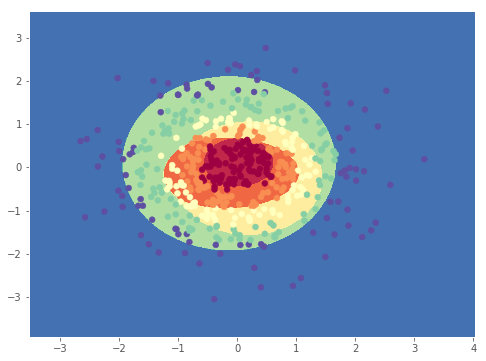

0.77


In [2]:
def plot_decision_boundary(clf, x, y):
    padding = 0.15
    resolution = 0.01
    
    # Feature range
    x0_min, x0_max = x[:,0].min(), x[:,0].max()
    x1_min, x1_max = x[:,1].min(), x[:,1].max()
    x0_range = x0_max - x0_min
    x1_range = x1_max - x1_min
    
    # Add padding
    x0_min -= x0_range * padding
    x0_max += x0_range * padding
    x1_min -= x1_range * padding
    x1_max += x1_range * padding

    # Create a meshgrid of points with the above ranges
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, resolution),
                           np.arange(x1_min, x1_max, resolution))
    
    # Use `clf` to predict each point of the meshgrid
    # `ravel()` turns a 2D array into a vector
    # `c_` concatenates vectors
    yy = clf.predict(np.c_[xx0.ravel(), xx1.ravel()])   

    # Reshape the 1D predictions back to a 2D meshgrid
    yy = yy.reshape(xx0.shape)
    
    # Plot the contours on the grid
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx0, xx1, yy, cmap=plt.cm.Spectral)
    
    # Plot the original data
    plt.scatter(x[:,0], x[:,1], s=35, c=y, cmap=plt.cm.Spectral)

    plt.show()

# Take a look at `sklearn.naive_bayes.GaussianNB`
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(train_x, train_y)
plot_decision_boundary(gnb, train_x, train_y)
print(accuracy_score(test_y, gnb.predict(test_x)))

## Do it yourself

Finish the above code cell to implement a naive bayes classifier.

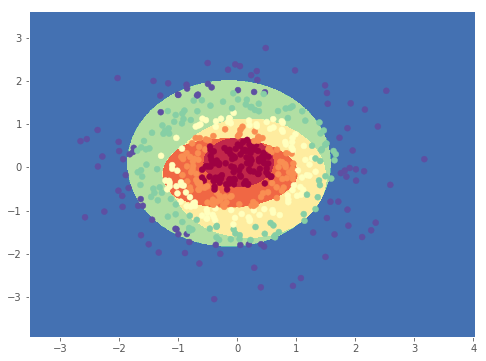

0.81


In [94]:
import numpy as np

class MyGaussianNB(object):
    def __init__(self):
        pass

    def split_dataset(self, x, y):
        # Seperate x by their corresponding label (y). There are 5 classes in our dataset.
        # Therefore, the output of this function is a dictionary with 5 keys:
        # {
        #   0: [[0.1, 0.5], [0.7, 0.05], ...],
        #   1: [[0.2, 0.6], [0.5, 0.08], ...],
        #   ....
        # }
        separated_data = {}
        unique_labels = np.unique(y)
        
        for label in unique_labels:
            separated_data[label] = [x_i for x_i, y_i in zip(x, y) if y_i == label]
        
        return separated_data
        #pass # TODO: remove pass and implement this function
        
    def compute_gaussian_params(self, data):
        # Input: samples with the same label
        # Output: Gaussian parameters (mean & standard deviation) of each feature
        # The output for our 2D dataset is a list of 2 tuples:
        # [(f1 mean, f1 stdev), (f2 mean, f2 stdev)]
        means = np.mean(data, axis=0)
        stdevs = np.std(data, axis=0)
        return list(zip(means, stdevs))

    def fit(self, x, y):
        separated_by_class = self.split_dataset(x, y)
        self.gaussian_params = {}
        
        for label, data in separated_by_class.items():
            self.gaussian_params[label] = self.compute_gaussian_params(data)
        # After this function, `self.gaussian_params` looks like
        # {
        # ------------------------------------------
        #   class: [fea1(mean, var), fea(mean, var)]
        # ------------------------------------------
        #   0    : [(0.5, 0.28), (0.6, 0.08)],
        #   1    : [(0.3, 0.04), (0.7, 0.14)],
        #   ...
        # }
    

    def probability_for_each_class(self, x):
        # Use self.gaussian_params to compute probability for each class for input x
        # The return array :
        # [0.0013, 0.0112, 0.0192, 0.0169, 0.0100]
        class_probabilities = {}
        for label, params in self.gaussian_params.items():
            class_probabilities[label] = 1.0
            for i, (mean, stdev) in enumerate(params):
                class_probabilities[label] *= self.calculate_probability(x[i], mean, stdev)
        return class_probabilities
        #pass # TODO: remove pass and implement this function
    def calculate_probability(self, x, mean, stdev):
        # calculate probability for an input feature
        exponent = np.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
        return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent
        #pass # TODO: remove pass and implement this function
    def predict(self, x):
        # Predict x, where x looks like [[0.12, 1.5], [0.56, 3.2], ...]
        y_pred = []
        for data in x:
            class_prob = self.probability_for_each_class(data)
            y_pred.append(max(class_prob, key=class_prob.get))
        return np.array(y_pred)

# TODO: change GaussianNB() to MyGaussianNB() once you finish the above code
gnb = MyGaussianNB()
gnb.fit(train_x, train_y)

plot_decision_boundary(gnb, train_x, train_y)
print(accuracy_score(test_y, gnb.predict(test_x)))